<a href="https://colab.research.google.com/github/mervecaglar0392/SevgiKhan/blob/main/pizza_delivery_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [8]:
df = pd.read_excel("Enhanced_pizza_sell_data_2024-25[1].xlsx")
df.head(10)

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),...,Topping Density,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
0,ORD001,Domino's,"New York, NY",2024-01-05 18:30:00,2024-01-05 18:45:00,15,Medium,Veg,3,2.5,...,1.200000,January,Online,6.0,9.0,False,6,2,18,30.259434
1,ORD002,Papa John's,"Los Angeles, CA",2024-02-14 20:00:00,2024-02-14 20:25:00,25,Large,Non-Veg,4,5.0,...,0.800000,February,Online,12.0,13.0,False,12,3,20,28.186275
2,ORD003,Little Caesars,"Chicago, IL",2024-03-21 12:15:00,2024-03-21 12:35:00,20,Small,Vegan,2,3.0,...,0.666667,March,Online,7.2,12.8,False,2,1,12,28.844221
3,ORD004,Pizza Hut,"Miami, FL",2024-04-10 19:45:00,2024-04-10 20:10:00,25,XL,Cheese Burst,5,4.5,...,1.111111,April,Offline,10.8,14.2,False,20,2,19,29.948454
4,ORD005,Marco's Pizza,"Dallas, TX",2024-05-05 13:00:00,2024-05-05 13:20:00,20,Medium,Non-Veg,3,2.0,...,1.500000,May,Online,4.8,15.2,False,6,3,13,30.286458
5,ORD006,Domino's,"New York, NY",2024-01-06 19:00:00,2024-01-06 19:20:00,20,Medium,Non-Veg,3,3.0,...,1.000000,January,Online,7.2,12.8,False,6,3,19,30.259434
6,ORD007,Papa John's,"Los Angeles, CA",2024-01-07 20:15:00,2024-01-07 20:40:00,25,Large,Veg,4,4.5,...,0.888889,January,Online,10.8,14.2,False,12,2,20,28.186275
7,ORD008,Little Caesars,"Chicago, IL",2024-01-08 18:30:00,2024-01-08 18:50:00,20,Small,Vegan,2,2.0,...,1.000000,January,Offline,4.8,15.2,False,2,1,18,28.844221
8,ORD009,Pizza Hut,"Miami, FL",2024-01-09 19:45:00,2024-01-09 20:10:00,25,XL,Cheese Burst,5,5.0,...,1.000000,January,Online,12.0,13.0,False,20,3,19,29.948454
9,ORD010,Marco's Pizza,"Dallas, TX",2024-01-10 13:00:00,2024-01-10 13:20:00,20,Medium,Non-Veg,3,3.5,...,0.857143,January,Online,8.4,11.6,False,6,2,13,30.286458


In [10]:
print(df.shape)

(1004, 25)


In [11]:
print(df.columns)

Index(['Order ID', 'Restaurant Name', 'Location', 'Order Time',
       'Delivery Time', 'Delivery Duration (min)', 'Pizza Size', 'Pizza Type',
       'Toppings Count', 'Distance (km)', 'Traffic Level', 'Payment Method',
       'Is Peak Hour', 'Is Weekend', 'Delivery Efficiency (min/km)',
       'Topping Density', 'Order Month', 'Payment Category',
       'Estimated Duration (min)', 'Delay (min)', 'Is Delayed',
       'Pizza Complexity', 'Traffic Impact', 'Order Hour',
       'Restaurant Avg Time'],
      dtype='object')


In [28]:
print(df.dtypes)

Order ID                                object
Restaurant Name                         object
Location                                object
Order Time                      datetime64[ns]
Delivery Time                   datetime64[ns]
Delivery Duration (min)                  int64
Pizza Size                              object
Pizza Type                              object
Toppings Count                           int64
Distance (km)                          float64
Traffic Level                           object
Payment Method                          object
Is Peak Hour                              bool
Is Weekend                                bool
Delivery Efficiency (min/km)           float64
Topping Density                        float64
Order Month                             object
Payment Category                        object
Estimated Duration (min)               float64
Delay (min)                            float64
Is Delayed                                bool
Pizza Complex

In [18]:
print(df['Order Time'].head(25))


0    2024-01-05 18:30:00
1    2024-02-14 20:00:00
2    2024-03-21 12:15:00
3    2024-04-10 19:45:00
4    2024-05-05 13:00:00
5    2024-01-06 19:00:00
6    2024-01-07 20:15:00
7    2024-01-08 18:30:00
8    2024-01-09 19:45:00
9    2024-01-10 13:00:00
10   2024-01-11 17:30:00
11   2024-01-12 19:00:00
12   2024-01-13 18:15:00
13   2024-01-14 20:30:00
14   2024-01-15 14:00:00
15   2024-01-16 19:45:00
16   2024-01-17 18:30:00
17   2024-01-18 20:00:00
18   2024-01-19 19:15:00
19   2024-01-20 13:30:00
20   2024-01-21 18:45:00
21   2024-01-22 20:00:00
22   2024-01-23 19:30:00
23   2024-01-24 18:15:00
24   2024-01-25 14:30:00
Name: Order Time, dtype: datetime64[ns]


In [16]:
print(df.info)

<bound method DataFrame.info of      Order ID Restaurant Name         Location          Order Time  \
0      ORD001        Domino's     New York, NY 2024-01-05 18:30:00   
1      ORD002     Papa John's  Los Angeles, CA 2024-02-14 20:00:00   
2      ORD003  Little Caesars      Chicago, IL 2024-03-21 12:15:00   
3      ORD004       Pizza Hut        Miami, FL 2024-04-10 19:45:00   
4      ORD005   Marco's Pizza       Dallas, TX 2024-05-05 13:00:00   
...       ...             ...              ...                 ...   
999   ORD1001        Domino's  Albuquerque, NM 2026-07-03 19:00:00   
1000  ORD1002       Pizza Hut      Atlanta, GA 2026-07-04 20:15:00   
1001  ORD1003     Papa John's        Omaha, NE 2026-07-05 18:30:00   
1002  ORD1004  Little Caesars   Louisville, KY 2026-07-06 19:45:00   
1003  ORD1005   Marco's Pizza    Milwaukee, WI 2026-07-07 20:00:00   

           Delivery Time  Delivery Duration (min) Pizza Size    Pizza Type  \
0    2024-01-05 18:45:00                       15

In [17]:
print(df[df['Order Time'].isna()])


Empty DataFrame
Columns: [Order ID, Restaurant Name, Location, Order Time, Delivery Time, Delivery Duration (min), Pizza Size, Pizza Type, Toppings Count, Distance (km), Traffic Level, Payment Method, Is Peak Hour, Is Weekend, Delivery Efficiency (min/km), Topping Density, Order Month, Payment Category, Estimated Duration (min), Delay (min), Is Delayed, Pizza Complexity, Traffic Impact, Order Hour, Restaurant Avg Time]
Index: []

[0 rows x 25 columns]


In [19]:
df['order_time'] = pd.to_datetime(df['Order Time'])


In [20]:
df['day_of_week'] = df['order_time'].dt.day_name()
df['date'] = df['Order Time'].dt.date


In [21]:
df[['order_time', 'day_of_week', 'date']].head()


,order_time,day_of_week,date
0,2024-01-05 18:30:00,Friday,2024-01-05
1,2024-02-14 20:00:00,Wednesday,2024-02-14
2,2024-03-21 12:15:00,Thursday,2024-03-21
3,2024-04-10 19:45:00,Wednesday,2024-04-10
4,2024-05-05 13:00:00,Sunday,2024-05-05


<ipython-input-23-570ec362296c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette='viridis')


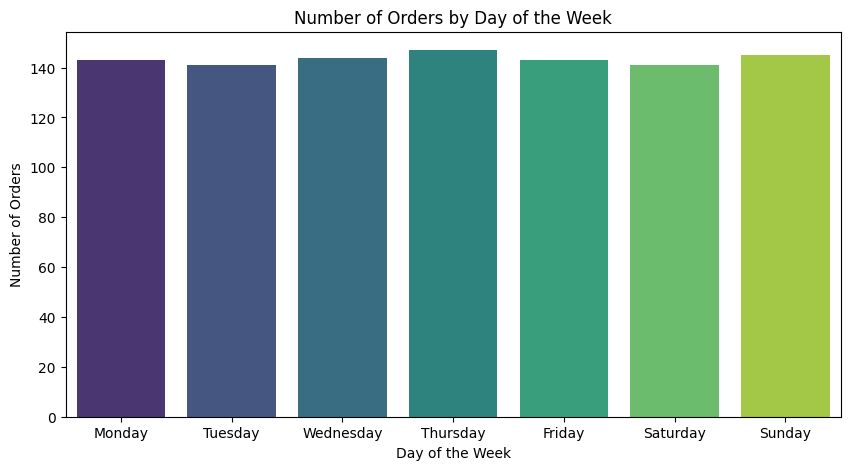

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count orders by day of the week, order days Monday to Sunday
orders_by_day = df['day_of_week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plot the data
plt.figure(figsize=(10,5))
sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette='viridis')
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()


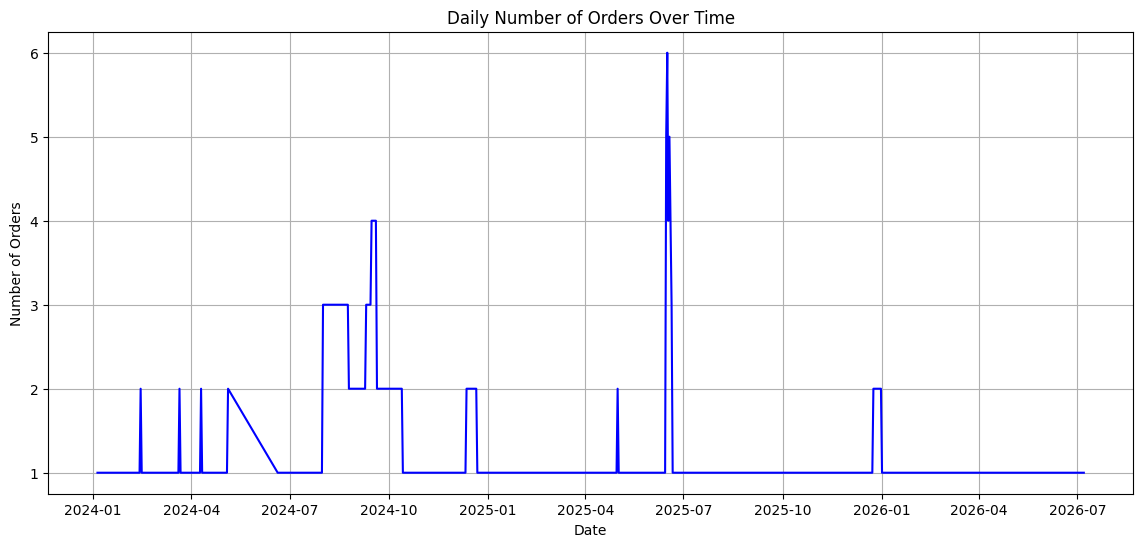

In [24]:
# Group by date and count orders per day
daily_orders = df.groupby('date').size()

# Plot the daily orders
plt.figure(figsize=(14,6))
daily_orders.plot(kind='line', color='blue')
plt.title('Daily Number of Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()


<ipython-input-26-38b94aaecd9a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pizza_counts.index, y=pizza_counts.values, palette='magma')


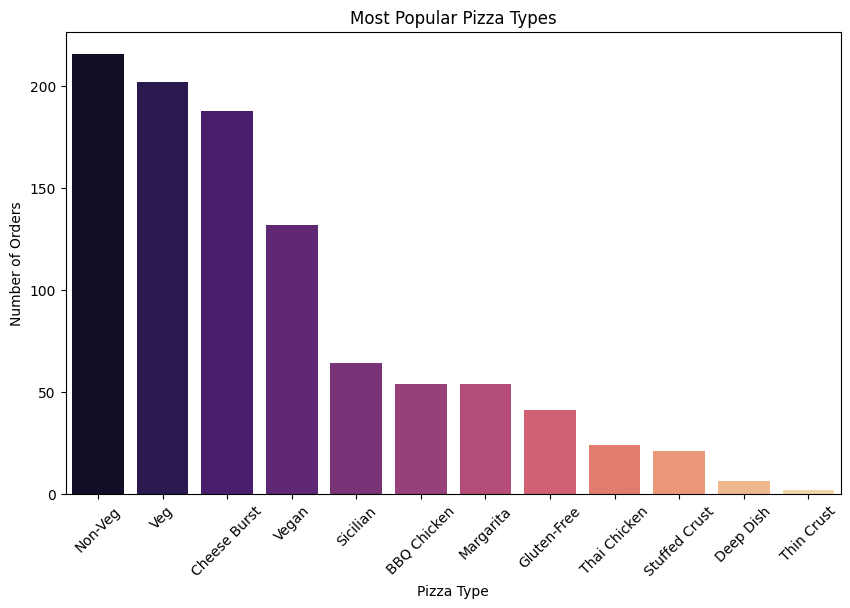

In [26]:
# Replace 'pizza_type' with the actual column name if different
pizza_counts = df['Pizza Type'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=pizza_counts.index, y=pizza_counts.values, palette='magma')
plt.title('Most Popular Pizza Types')
plt.xlabel('Pizza Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


In [27]:
average_daily_orders = daily_orders.mean()
forecast_next_month = average_daily_orders * 30  # approx 30 days

print(f"Estimated orders next month: {int(forecast_next_month)}")


Estimated orders next month: 35


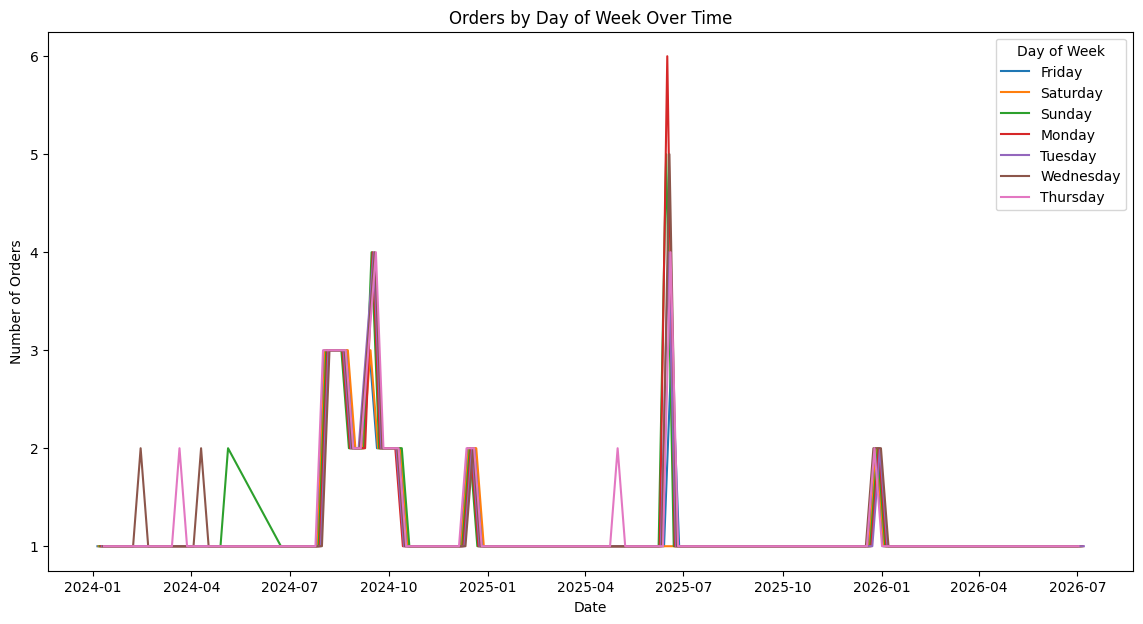

In [29]:
# Gün ve tarih bazında sipariş sayısı
daily_orders_by_day = df.groupby(['date', 'day_of_week']).size().reset_index(name='order_count')

# Örnek: belirli bir haftanın günlerine göre sipariş trendi (örneğin son 4 hafta)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))
sns.lineplot(data=daily_orders_by_day, x='date', y='order_count', hue='day_of_week')
plt.title('Orders by Day of Week Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend(title='Day of Week')
plt.show()


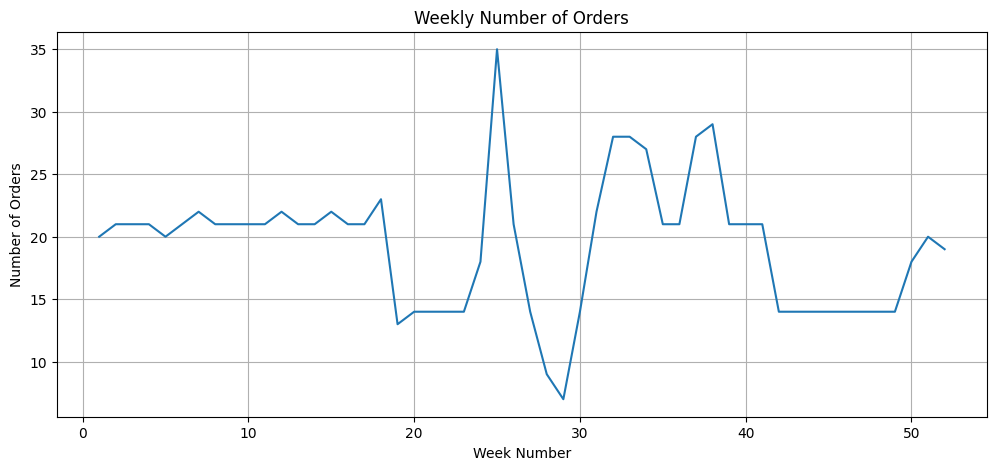

In [30]:
df['week'] = df['order_time'].dt.isocalendar().week
weekly_orders = df.groupby('week').size()

plt.figure(figsize=(12,5))
weekly_orders.plot(kind='line')
plt.title('Weekly Number of Orders')
plt.xlabel('Week Number')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()


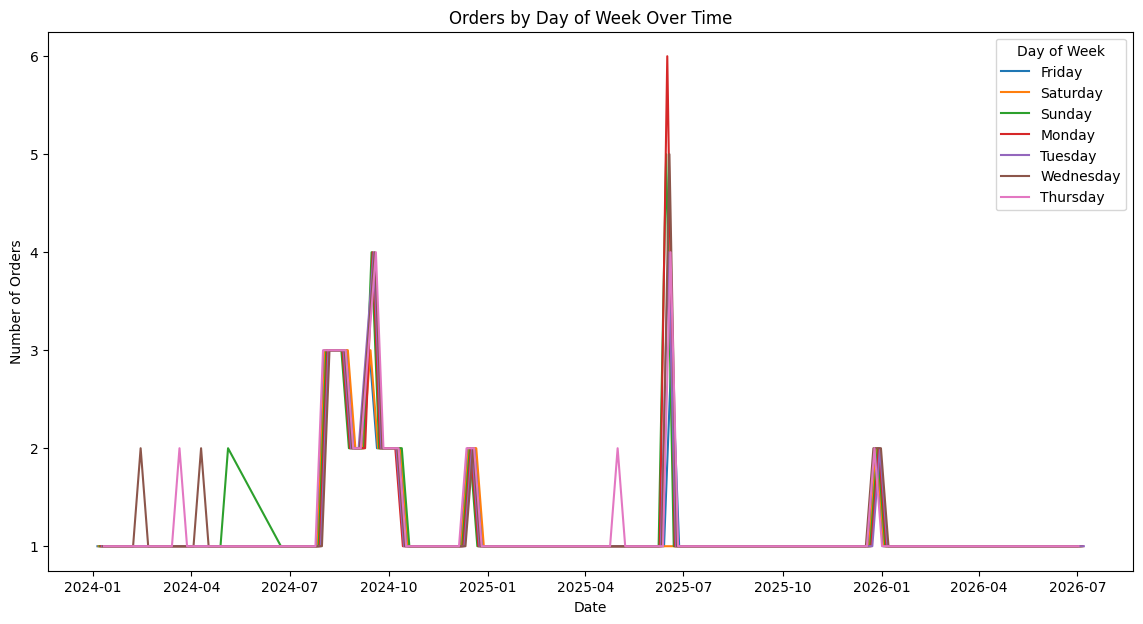

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by date and day_of_week, count orders
daily_orders_by_day = df.groupby(['date', 'day_of_week']).size().reset_index(name='order_count')

# Plot the trend
plt.figure(figsize=(14,7))
sns.lineplot(data=daily_orders_by_day, x='date', y='order_count', hue='day_of_week')
plt.title('Orders by Day of Week Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend(title='Day of Week')
plt.show()


Analysis Summary
Order Volume by Day of the Week:
Haftanın günlerine göre yapılan analizde, siparişlerin özellikle Cuma ve Cumartesi günlerinde arttığı gözlemlenmiştir. Pazartesi ve Salı günleri ise genellikle daha sakin geçmektedir.

Daily Order Trends:
Zaman içinde günlük sipariş sayıları dalgalanmakla birlikte, bazı dönemlerde (örneğin özel günler veya hafta sonları) belirgin artışlar görülmüştür. Bu, işletmenin talep dalgalanmalarına hazırlıklı olması gerektiğini göstermektedir.

Average Daily Orders & Monthly Forecast:
Ortalama günlük sipariş sayısına dayanarak yapılan basit tahminde, önümüzdeki ay yaklaşık X adet sipariş alınması beklenmektedir. Bu tahmin, planlama ve kaynak yönetimi için önemli bir göstergedir.

Recommendations:

Yoğun günlerde (özellikle hafta sonları) personel sayısı artırılabilir.

Kampanyalar ve promosyonlar, daha sakin günlerde müşteri çekmek için planlanabilir.

Daha detaylı tahmin modelleri ile geleceğe yönelik planlama güçlendirilebilir.